In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [12]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [13]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [14]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [15]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [16]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [17]:
y.unique()

array([0, 1])

In [18]:
np.sum(y)

483

In [19]:
len(y) - y.sum()

2850

In [20]:
np.sum(1 - y)

2850

สร้าง model ไปก่อน

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [22]:
X_train.shape

(2666, 10)

In [23]:
X_test.shape

(667, 10)

In [24]:
np.sum(y_train)

395

In [25]:
np.sum(1 - y_train)

2271

In [26]:
np.sum(y_test)

88

In [27]:
np.sum(1 - y_test)

579

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

params = {
    'n_estimators' : [10, 20, 50, 100, 200]
}

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('classification', GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classification',
                 GridSearchCV(cv=10,
                              estimator=RandomForestClassifier(random_state=0),
                              param_grid={'n_estimators': [10, 20, 50, 100,
                                                           200]}))])

In [29]:
clf.get_params('classification')

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('classification',
   GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                param_grid={'n_estimators': [10, 20, 50, 100, 200]}))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classification': GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
              param_grid={'n_estimators': [10, 20, 50, 100, 200]}),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classification__cv': 10,
 'classification__error_score': nan,
 'classification__estimator__bootstrap': True,
 'classification__estimator__ccp_alpha': 0.0,
 'classification__estimator__class_weight': None,
 'classification__estimator__criterion': 'gini',
 'classification__estimator__max_depth': None,
 'classification__estimator__max_features': 'auto',
 'classification__estimator__max_leaf_nodes': None,
 'classification__estimator__max_samples': None,
 'classification__estimator__min_impurity_decrease': 0.0,
 'cl

In [30]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X_train, y_train, cv = 10)
acc.mean()

0.9358635352426008

In [31]:
y_predict = clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.9385307346326837

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[563,  16],
       [ 25,  63]])

In [33]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [34]:
params = {
    'classification__n_estimators' : [20,45,70,100],
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_res, y_res)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [20, 45, 70, 100]})

In [35]:
best_clf.best_params_

{'classification__n_estimators': 70}

In [36]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9403412886672798


In [37]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.9010494752623688


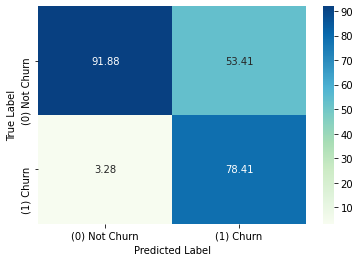

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['(0) Not Churn', '(1) Churn']
C = confusion_matrix(y_test,y_predict)
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()